In [15]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker

In [16]:
fs = 300

# Utilities

In [17]:
# plot a signal
def plot_signal(title, x_label, y_label, x, y):
    plt.title(title, fontsize=20)
    plt.plot(x, y, linewidth=3)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid()
    fig = plt.gcf()
    fig.set_size_inches(14, 8)
    plt.show()

In [18]:
# calculate the energy of a signal
def energy(signal:np.ndarray):
    E = np.sum(np.square(signal)) / fs
    return E

# 1.1 Gram-Schmidt Orthogonalization

In [19]:
# computes the orthonormal bases for the subspace spanned by s1 and s2 using gram shmidt, s1 and s2 are two vectors of size 1xn

def GM_Bases(s1:np.ndarray, s2:np.ndarray):
    phi1 = s1
    phi1_normalized = phi1 / np.sqrt(energy(phi1))  # normalize the first basis

    integral = np.dot(s2, phi1) / fs
    phi2 = s2 - integral * phi1
    phi2_normalized = phi2 / np.sqrt(energy(phi2)) # normalize the second basis

    return phi1_normalized, phi2_normalized

# 1.2 Signal Space Representation

In [20]:
"""
The function calculates the signal space representation of the input signal s over the orthonormal bases phi1 and phi2
s is 1xn vector
phi1 and phi2 are two 1xn vectors that represent the two orthonormal bases functions
The function outputs the projections (the correlations) of s over phi and phi2
"""
def signal_space(s:np.ndarray, phi1:np.ndarray, phi2:np.ndarray):
    # compute the projections
    phi1_proj = np.dot(s, phi1) / fs
    phi2_proj = np.dot(s, phi2) / fs
    # return the projections
    return phi1_proj, phi2_proj

# 1.3 Additive White Gaussian Noise (AWGN)

In [21]:
def AWGN(s, E_div_var_db):
    E_div_var = 10 ** (E_div_var_db / 10)
    E = energy(s)
    μ = 0
    σ = np.sqrt(E / E_div_var)
    w = np.random.normal(loc=μ, scale=σ, size=len(s))
    return s + w

# 1.4 Requirements

## Creating s1(t) and s2(t)

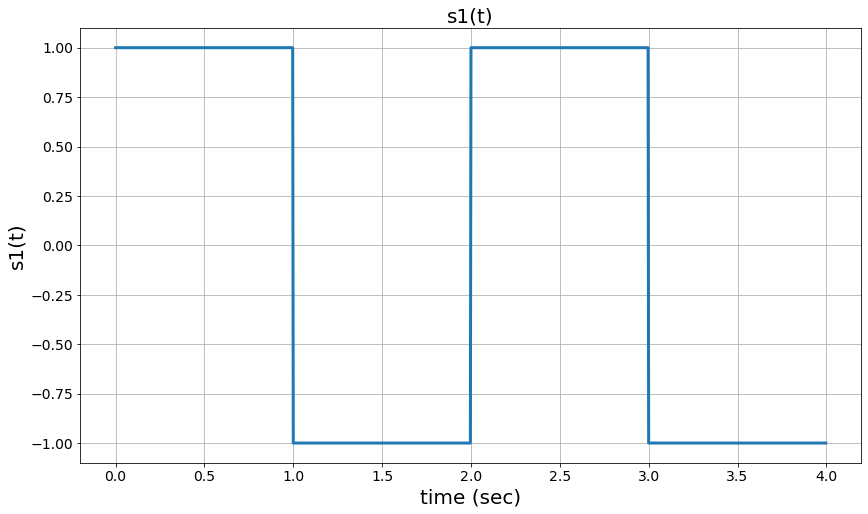

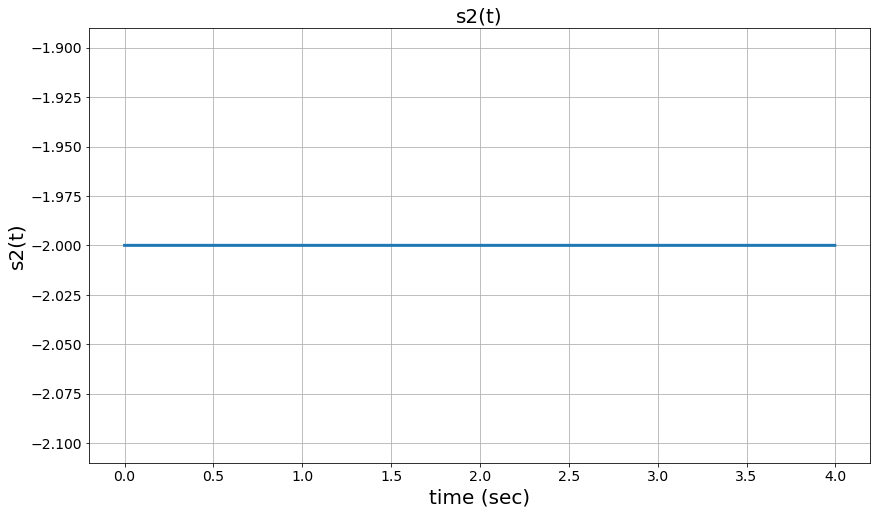

In [22]:
time = np.arange(0, 4, 1 / fs)

# creating s1(t)
s1 = np.ones(len(time))
s1[int(0.25 * s1.shape[0]) : int(0.5 * s1.shape[0])] = -1
s1[int(0.75 * s1.shape[0]):] = -1
plot_signal("s1(t)", "time (sec)", "s1(t)", time, s1)

# creating s2(t)
s2 = -2 * np.ones(len(time))
plot_signal("s2(t)", "time (sec)", "s2(t)", time, s2)

In [23]:
# time = np.arange(0, 1, 1 / fs)

# # creating s1(t)
# s1 = np.ones(len(time))
# plot_signal("s1(t)", "time (sec)", "s1(t)", time, s1)

# # creating s2(t)
# s2 = np.ones(len(time))
# s2[int(0.75 * s2.shape[0]):] = -1
# plot_signal("s2(t)", "time (sec)", "s2(t)", time, s2)

## Requirement 1

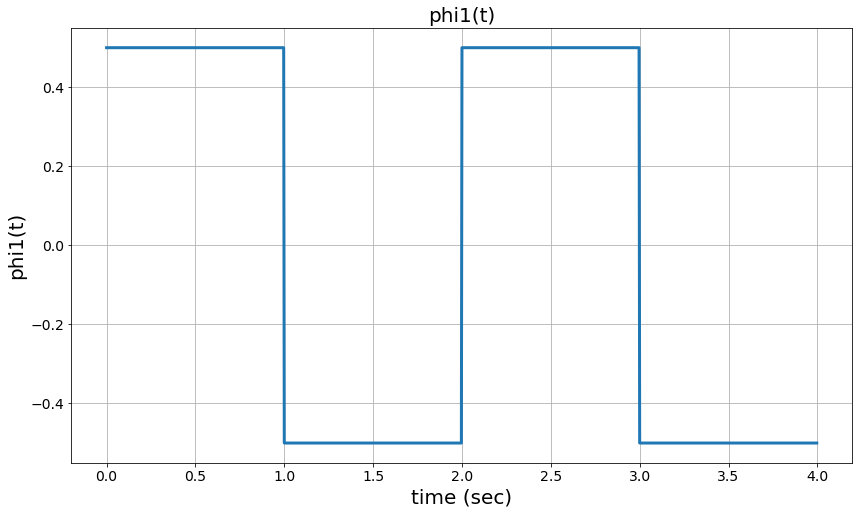

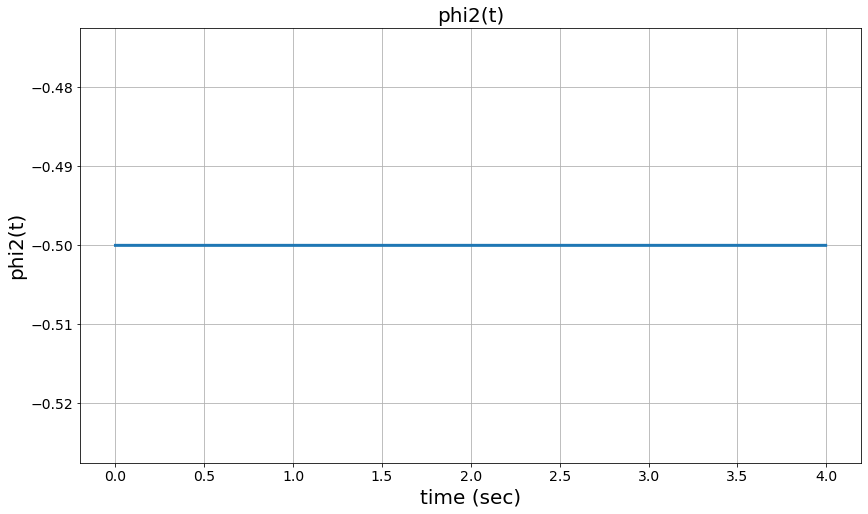

In [24]:
phi1, phi2 = GM_Bases(s1, s2)
plot_signal("phi1(t)", "time (sec)", "phi1(t)", time, phi1)
plot_signal("phi2(t)", "time (sec)", "phi2(t)", time, phi2)

## Requirement 2

(2.0, 0.0)
(0.0, 4.0)


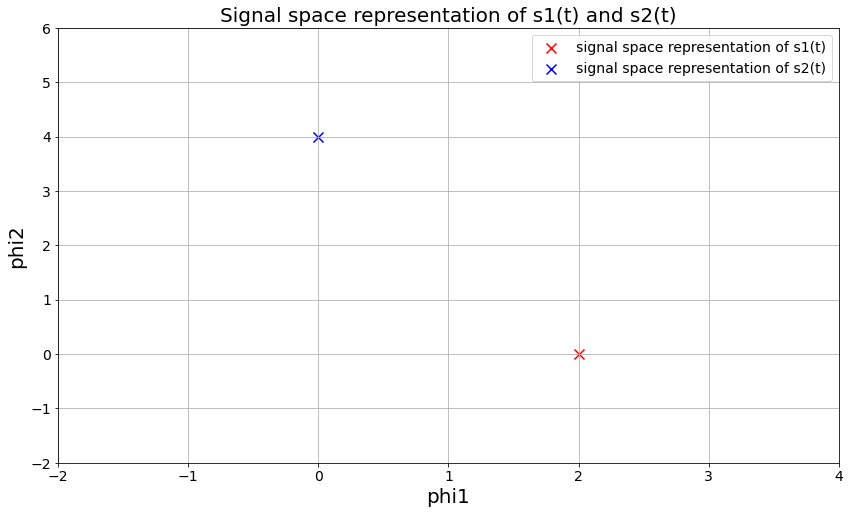

In [25]:
signal_space1 = signal_space(s1, phi1, phi2)
signal_space2 = signal_space(s2, phi1, phi2)

print(signal_space1)
print(signal_space2)


x = np.asarray([signal_space1[0], signal_space2[0]])
y = np.asarray([signal_space1[1], signal_space2[1]])
plt.title("Signal space representation of s1(t) and s2(t)", fontsize=20)
p1 = plt.scatter([x[0]], [y[0]], marker='x', color=['red'], s=100)
p2 = plt.scatter([x[1]], [y[1]], marker='x', color=['blue'], s=100)
plt.legend((p1, p2), ["signal space representation of s1(t)", "signal space representation of s2(t)"], fontsize=14)
plt.xlabel('phi1', fontsize=20)
plt.ylabel('phi2', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.gcf().set_size_inches(14, 8)
plt.xlim([np.min(x) - 2, np.max(x) + 2])
plt.ylim([np.min(y) - 2, np.max(y) + 2])
plt.show()

## Testing the validity of the implemented functions by reconstructing the original signals

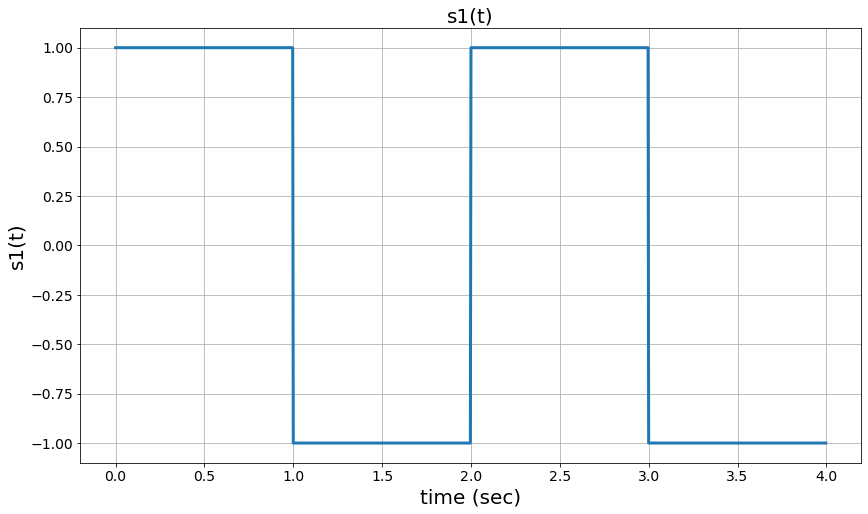

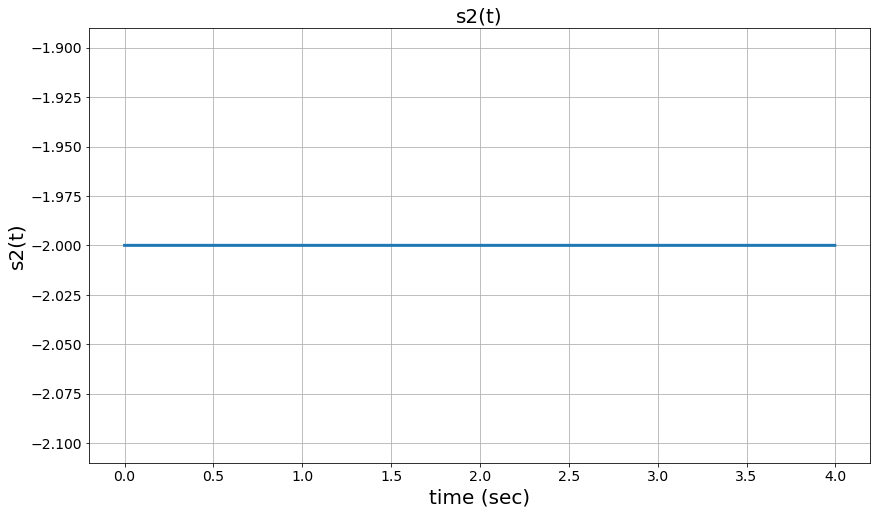

In [26]:
g1 = signal_space1[0] * phi1 + signal_space1[1] * phi2
g2 = signal_space2[0] * phi1 + signal_space2[1] * phi2
plot_signal("s1(t)", "time (sec)", "s1(t)", time, g1)
plot_signal("s2(t)", "time (sec)", "s2(t)", time, g2)

# Requirement 3

In [27]:
def scatter(title, signal_space1, signal_space2):
    plt.title(title, fontsize=20)
    p1 = plt.scatter(signal_space1[:, 0], signal_space1[:, 1], color=['red'], s=40)
    p2 = plt.scatter(signal_space2[:, 0], signal_space2[:, 1], color=['blue'], s=40)
    plt.legend((p1, p2), ["signal space representation of r1(t)", "signal space representation of r2(t)"], fontsize=14)
    plt.xlabel('phi1', fontsize=20)
    plt.ylabel('phi2', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    plt.grid()
    plt.gcf().set_size_inches(14, 8)
    plt.xlim([min(min(signal_space1[:, 0]), min(signal_space2[:, 0])) - 2, max(max(signal_space1[:, 0]), max(signal_space2[:, 0])) + 2])
    plt.ylim([min(min(signal_space1[:, 1]), min(signal_space2[:, 1])) - 2, max(max(signal_space1[:, 1]), max(signal_space2[:, 1])) + 2])
    plt.show()

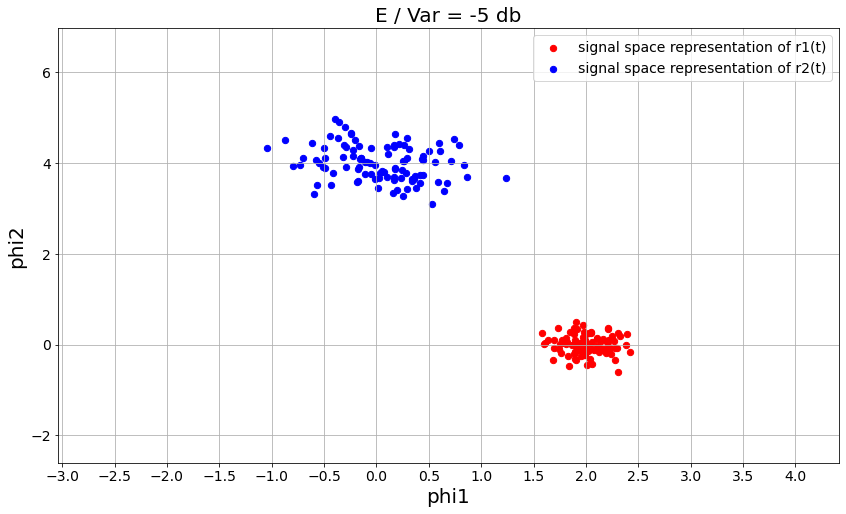

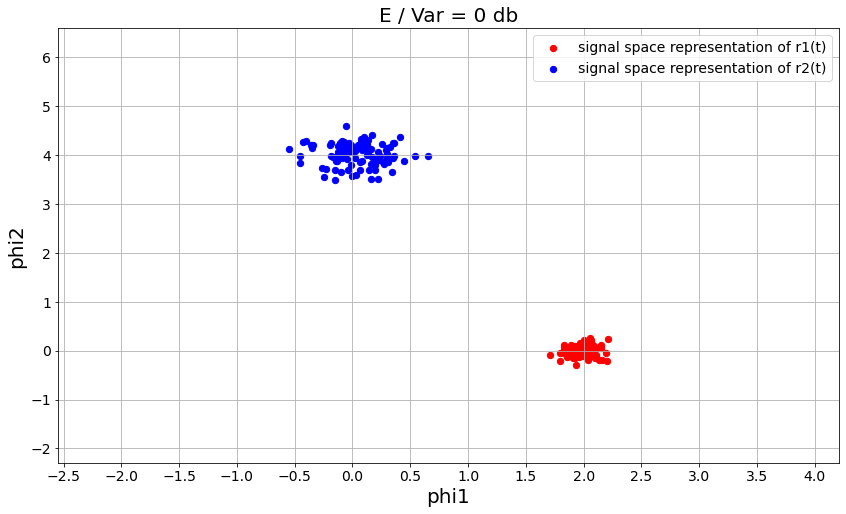

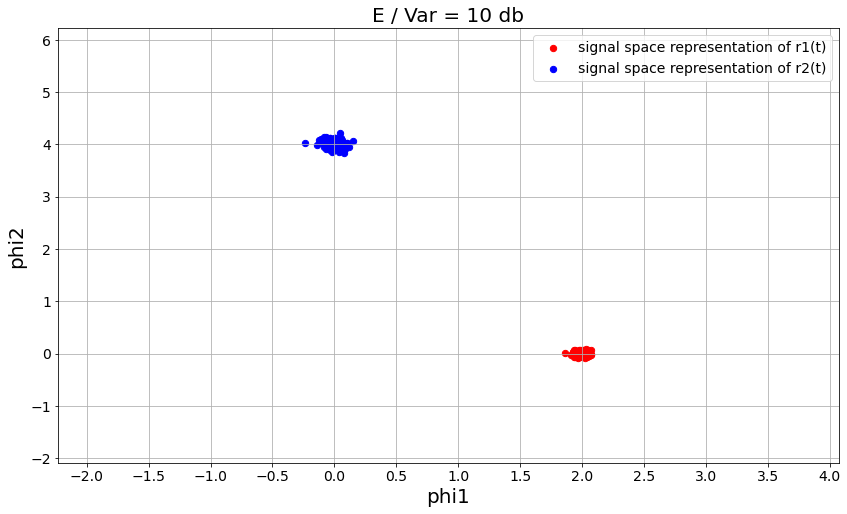

In [28]:
noise_samples = 100
db_values = [-5, 0, 10]
titles = ['E / Var = -5 db', 'E / Var = 0 db', 'E / Var = 10 db']
signal_space1 = np.empty((noise_samples, 2))
signal_space2 = np.empty((noise_samples, 2))
for i in range(len(db_values)):
    for j in range(noise_samples):
        r1 = AWGN(s1, db_values[i])
        r2 = AWGN(s2, db_values[i])
        signal_space1_v = signal_space(r1, phi1, phi2)
        signal_space2_v = signal_space(r2, phi1, phi2)
        signal_space1[j] = signal_space1_v
        signal_space2[j] = signal_space2_v

    scatter(titles[i], signal_space1, signal_space2)
